The data set is a churn dataset for customers of a grocery store on a monthly subscription. 

The two goals in this workbook is to

1. Determine the major drivers of a customer churning. Which variables are the indicators of if a customer would churn or not
2. Predict if a customer would churn or not

For this we are carrying out the following stages 
1. Data cleaning and EDA
2. Feature engineering
3. model development 
4. Model evaluation
5. Conclusion


To proceed with this we would import our data and the needed libraries


In [115]:
#import libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, recall_score, precision_recall_curve, precision_score, roc_auc_score, roc_curve, accuracy_score
 

In [72]:
#import the dataset and view the imported data set 
data = pd.read_csv('https://raw.githubusercontent.com/Pelumioluwa/MBAN6110Class/main/Data/churn_data.csv')
data

,Unnamed: 0,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
0,0,1,46,US,iOS,756.005761,39,2,582.023075,92,...,280.397827,60,0,700.181510,66,3,382.719682,59,0,1
1,1,2,52,US,iOS,594.838157,59,0,251.269898,33,...,863.000645,89,1,571.331352,28,3,570.203975,89,0,1
2,2,3,43,Canada,Android,453.217405,21,3,124.178946,92,...,858.545990,60,5,198.222684,38,1,187.475764,79,5,1
3,3,4,41,US,iOS,621.453170,95,1,134.362559,46,...,404.590146,59,3,565.395592,78,1,281.415092,63,4,1
4,4,5,41,US,iOS,660.735119,48,5,713.265527,54,...,178.143438,85,1,574.382094,34,2,544.981985,28,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9996,35,Great Britain,iOS,496.165324,84,1,735.148231,60,...,708.936256,77,4,672.755957,23,5,710.675753,60,4,0
9996,9996,9997,59,Great Britain,iOS,138.836616,76,3,673.599667,52,...,736.393247,57,4,379.113761,75,4,870.230372,15,3,0
9997,9997,9998,45,US,iOS,533.289217,106,4,367.139990,41,...,567.421148,50,3,633.113010,89,5,624.403650,35,4,0
9998,9998,9999,58,Australia,iOS,684.746137,70,0,751.149320,105,...,239.675846,32,5,103.703552,97,5,731.775049,28,4,0


Further to importing the dataset and the needed libraries we would conduct data cleaning and data exploration. To do this, we would following the steps below

1. check the shape and column of the dataset 
2. get statistical information of our dataset  
3. Check the datatype of data column: All the data columns are the right datatypes
4. check for missing values: There are no missing values in the dataset 
5. check for duplicates: There are no duplicates in the dataset  
6. check for outliers : There are no outliers in the dataset
7. conduct data cleaning: 
    Remove the unnamed column
    Checked the unique values of categorical data (location, device and churn) to ensure that only the values in the each column were only the categories for each column  

In [73]:
#check how many rows and columns in the dataset
data.shape

(10000, 42)

In [74]:
#Get stastical information on the dataset 
print('\nSummary statistics for all variables:')
print(data.describe(include='all'))


Summary statistics for all variables:
         Unnamed: 0   CustomerID           Age Location   Device  \
count   10000.00000  10000.00000  10000.000000    10000    10000   
unique          NaN          NaN           NaN        4        2   
top             NaN          NaN           NaN   Canada  Android   
freq            NaN          NaN           NaN     4258     5736   
mean     4999.50000   5000.50000     42.698500      NaN      NaN   
std      2886.89568   2886.89568     12.495528      NaN      NaN   
min         0.00000      1.00000     20.000000      NaN      NaN   
25%      2499.75000   2500.75000     32.000000      NaN      NaN   
50%      4999.50000   5000.50000     43.000000      NaN      NaN   
75%      7499.25000   7500.25000     53.000000      NaN      NaN   
max      9999.00000  10000.00000     65.000000      NaN      NaN   

        Month_1_Spend  Month_1_Items  Month_1_Support_Calls  Month_2_Spend  \
count    10000.000000   10000.000000           10000.000000   1000

In [75]:
#check the datatype of each colum
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              10000 non-null  int64  
 1   CustomerID              10000 non-null  int64  
 2   Age                     10000 non-null  int64  
 3   Location                10000 non-null  object 
 4   Device                  10000 non-null  object 
 5   Month_1_Spend           10000 non-null  float64
 6   Month_1_Items           10000 non-null  int64  
 7   Month_1_Support_Calls   10000 non-null  int64  
 8   Month_2_Spend           10000 non-null  float64
 9   Month_2_Items           10000 non-null  int64  
 10  Month_2_Support_Calls   10000 non-null  int64  
 11  Month_3_Spend           10000 non-null  float64
 12  Month_3_Items           10000 non-null  int64  
 13  Month_3_Support_Calls   10000 non-null  int64  
 14  Month_4_Spend           10000 non-null 

In [76]:
# Check for missing values
missing = data.isnull().any()
print(missing)


Unnamed: 0                False
CustomerID                False
Age                       False
Location                  False
Device                    False
Month_1_Spend             False
Month_1_Items             False
Month_1_Support_Calls     False
Month_2_Spend             False
Month_2_Items             False
Month_2_Support_Calls     False
Month_3_Spend             False
Month_3_Items             False
Month_3_Support_Calls     False
Month_4_Spend             False
Month_4_Items             False
Month_4_Support_Calls     False
Month_5_Spend             False
Month_5_Items             False
Month_5_Support_Calls     False
Month_6_Spend             False
Month_6_Items             False
Month_6_Support_Calls     False
Month_7_Spend             False
Month_7_Items             False
Month_7_Support_Calls     False
Month_8_Spend             False
Month_8_Items             False
Month_8_Support_Calls     False
Month_9_Spend             False
Month_9_Items             False
Month_9_

In [77]:
#check for duplicates 
dup = data['CustomerID'].duplicated().any()
print(dup)

False


In [78]:
#drop the unnamed column as it is not needed
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
0,1,46,US,iOS,756.005761,39,2,582.023075,92,2,...,280.397827,60,0,700.181510,66,3,382.719682,59,0,1
1,2,52,US,iOS,594.838157,59,0,251.269898,33,2,...,863.000645,89,1,571.331352,28,3,570.203975,89,0,1
2,3,43,Canada,Android,453.217405,21,3,124.178946,92,0,...,858.545990,60,5,198.222684,38,1,187.475764,79,5,1
3,4,41,US,iOS,621.453170,95,1,134.362559,46,5,...,404.590146,59,3,565.395592,78,1,281.415092,63,4,1
4,5,41,US,iOS,660.735119,48,5,713.265527,54,2,...,178.143438,85,1,574.382094,34,2,544.981985,28,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,35,Great Britain,iOS,496.165324,84,1,735.148231,60,2,...,708.936256,77,4,672.755957,23,5,710.675753,60,4,0
9996,9997,59,Great Britain,iOS,138.836616,76,3,673.599667,52,4,...,736.393247,57,4,379.113761,75,4,870.230372,15,3,0
9997,9998,45,US,iOS,533.289217,106,4,367.139990,41,1,...,567.421148,50,3,633.113010,89,5,624.403650,35,4,0
9998,9999,58,Australia,iOS,684.746137,70,0,751.149320,105,4,...,239.675846,32,5,103.703552,97,5,731.775049,28,4,0


In [79]:
#Get stastical information on the dataset 
data.describe(include='all')

,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,...,Month_10_Spend,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn
count,10000.00000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
unique,NaN,NaN,4,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Canada,Android,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4258,5736,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,42.698500,NaN,NaN,482.593336,64.657700,2.488800,476.297118,63.118000,2.517400,...,473.630524,58.227900,2.487000,472.671126,56.968900,2.519500,478.629330,56.512600,2.496300,0.70000
std,2886.89568,12.495528,NaN,NaN,237.961476,29.329527,1.711306,237.491820,28.933247,1.703639,...,235.090366,25.909251,1.721083,234.288930,25.615119,1.702266,233.135282,25.263995,1.713674,0.45828
min,1.00000,20.000000,NaN,NaN,45.147050,12.000000,0.000000,46.283232,12.000000,0.000000,...,45.784922,12.000000,0.000000,45.139863,12.000000,0.000000,45.093583,12.000000,0.000000,0.00000
25%,2500.75000,32.000000,NaN,NaN,275.978779,39.000000,1.000000,268.427326,38.000000,1.000000,...,268.470286,36.000000,1.000000,269.432095,35.000000,1.000000,276.507055,35.000000,1.000000,0.00000
50%,5000.50000,43.000000,NaN,NaN,482.173250,65.000000,2.000000,474.442784,63.000000,3.000000,...,472.391691,58.000000,2.000000,472.530676,57.000000,3.000000,481.872558,56.000000,3.000000,1.00000
75%,7500.25000,53.000000,NaN,NaN,688.898992,90.000000,4.000000,680.824377,88.000000,4.000000,...,680.923305,80.000000,4.000000,673.599392,78.000000,4.000000,681.397961,77.000000,4.000000,1.00000


In [80]:
#check unique values for categorical data to ensure there are no non-categorical data in the 
#columns
print(data['Location'].unique())
print(data['Device'].unique())
print(data['Churn'].unique())

['US' 'Canada' 'Great Britain' 'Australia']
['iOS' 'Android']
[1 0]


<AxesSubplot:xlabel='Churn', ylabel='Month_6_Spend'>

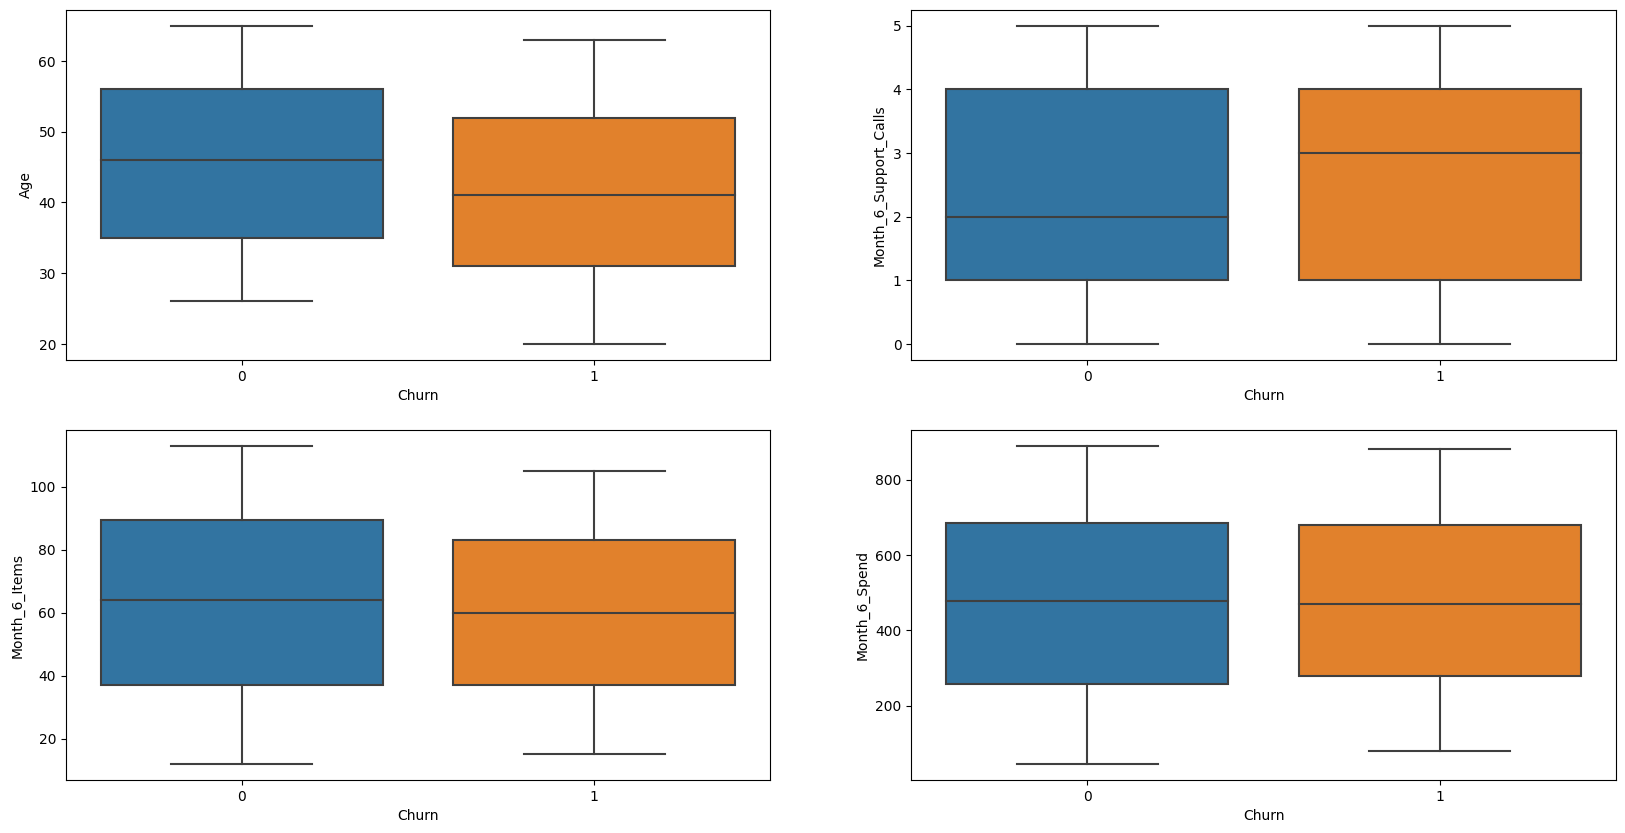

In [81]:
#check for outliers 
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(20,10))
sns.boxplot(x='Churn', y='Age', ax=ax1, data=data)
sns.boxplot(x='Churn', y='Month_6_Support_Calls', ax=ax2, data=data)
sns.boxplot(x='Churn', y='Month_6_Items', ax=ax3, data=data)
sns.boxplot(x='Churn', y='Month_6_Spend', ax=ax4, data=data)


Afte initial data cleaning, we are going to conduct data exploration to visulaise the spread of the data. 

1. visiualize the distribution of the data: It is visible that the distrubition of the data is skewed. However, the distribution of the churn data is ....
2. Visualise the trend of churn across variables 
3. Visualise the relationship of data for numerical data 
4. Get the porportions for the categorical data 
5. categorize age into bins 
6. convert categorical data dummy data 
7. scale numerical data 

(array([ 751.,  920., 1163.,  931., 1175.,  925., 1196.,  919., 1163.,
         857.]),
 array([20. , 24.5, 29. , 33.5, 38. , 42.5, 47. , 51.5, 56. , 60.5, 65. ]),
 <BarContainer object of 10 artists>)

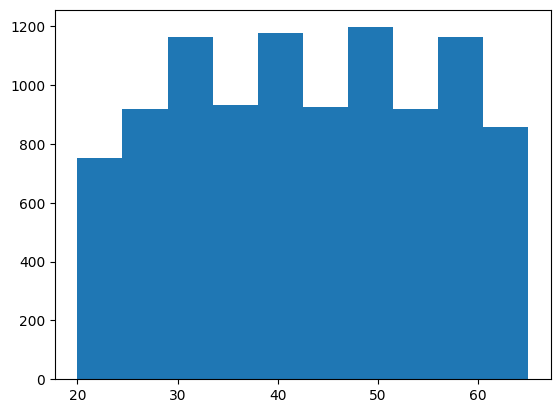

In [82]:
plt.hist(data['Age'])

(array([4264.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5736.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

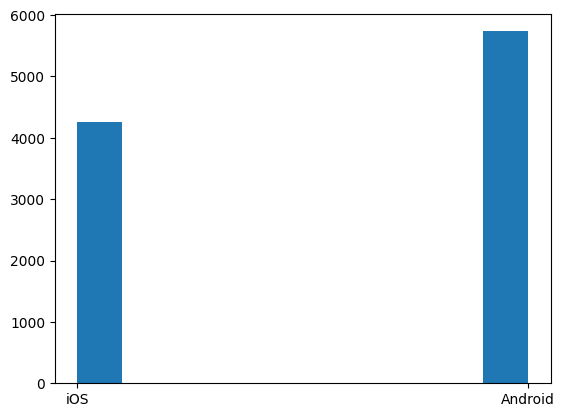

In [83]:
plt.hist(data['Device'])

(array([4255.,    0.,    0., 4258.,    0.,    0.,  762.,    0.,    0.,
         725.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

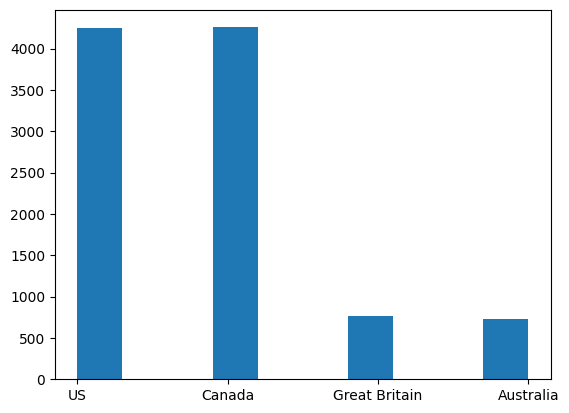

In [84]:
plt.hist(data['Location'])

(array([3000.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

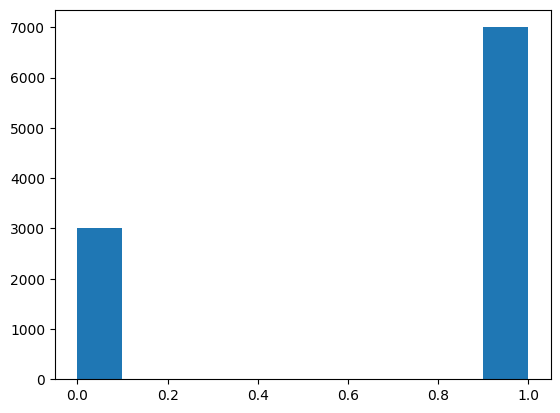

In [85]:
plt.hist(data['Churn'])

In [86]:
#get the column names
data.columns

Index(['CustomerID', 'Age', 'Location', 'Device', 'Month_1_Spend',
       'Month_1_Items', 'Month_1_Support_Calls', 'Month_2_Spend',
       'Month_2_Items', 'Month_2_Support_Calls', 'Month_3_Spend',
       'Month_3_Items', 'Month_3_Support_Calls', 'Month_4_Spend',
       'Month_4_Items', 'Month_4_Support_Calls', 'Month_5_Spend',
       'Month_5_Items', 'Month_5_Support_Calls', 'Month_6_Spend',
       'Month_6_Items', 'Month_6_Support_Calls', 'Month_7_Spend',
       'Month_7_Items', 'Month_7_Support_Calls', 'Month_8_Spend',
       'Month_8_Items', 'Month_8_Support_Calls', 'Month_9_Spend',
       'Month_9_Items', 'Month_9_Support_Calls', 'Month_10_Spend',
       'Month_10_Items', 'Month_10_Support_Calls', 'Month_11_Spend',
       'Month_11_Items', 'Month_11_Support_Calls', 'Month_12_Spend',
       'Month_12_Items', 'Month_12_Support_Calls', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='Month_6_Support_Calls', ylabel='Month_6_Items'>

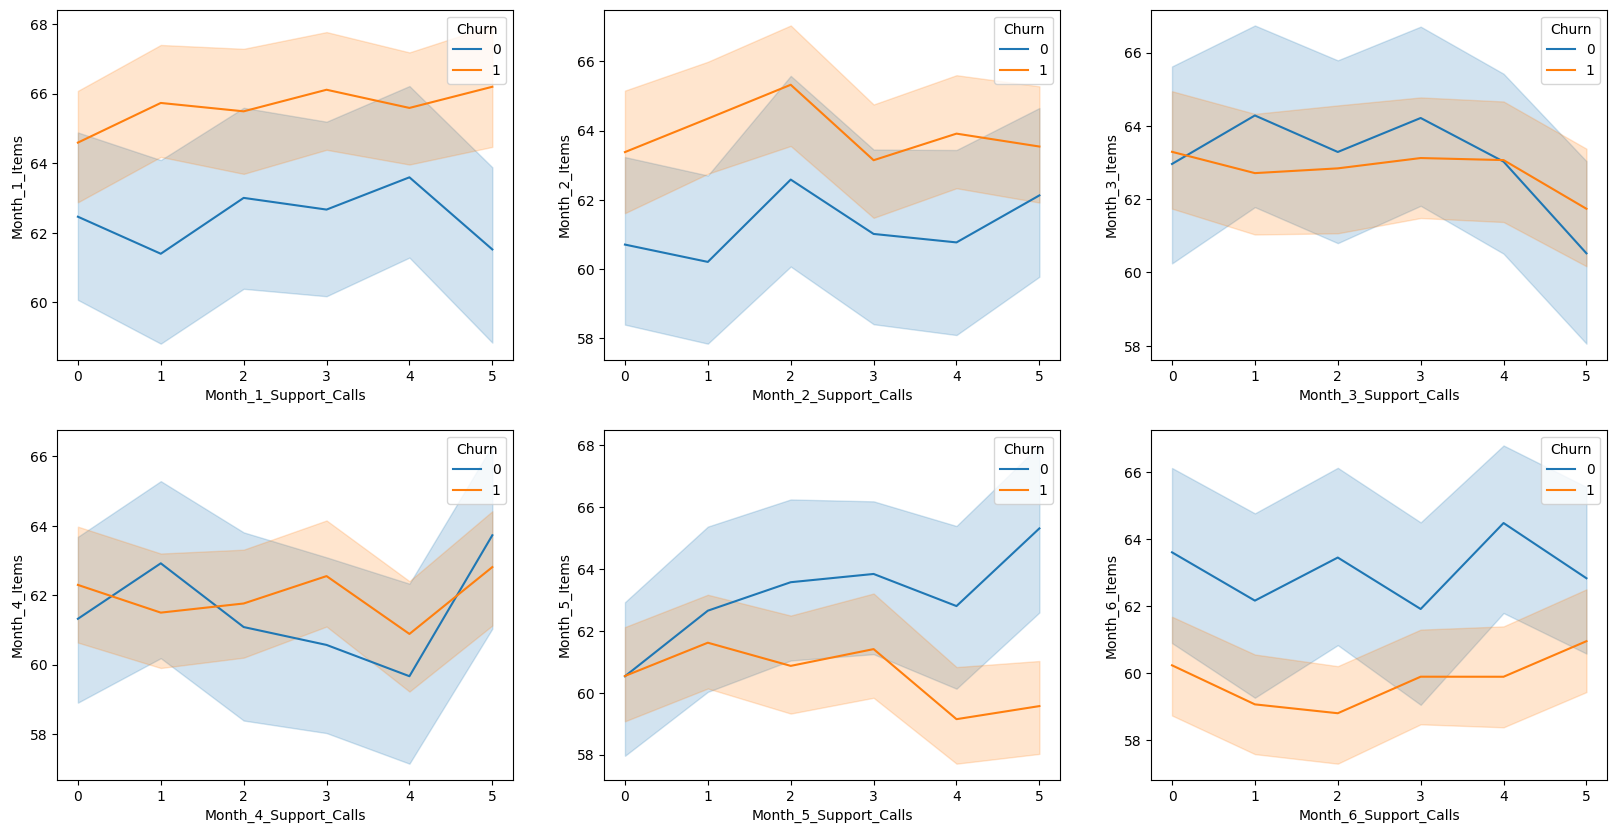

In [87]:
#Explore data to see the trend 
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.lineplot(x='Month_1_Support_Calls', y='Month_1_Items', ax=ax1, data=data, hue='Churn')
sns.lineplot(x='Month_2_Support_Calls', y='Month_2_Items', ax=ax2, data=data, hue='Churn')
sns.lineplot(x='Month_3_Support_Calls', y='Month_3_Items', ax=ax3, data=data, hue='Churn')
sns.lineplot(x='Month_4_Support_Calls', y='Month_4_Items', ax=ax4, data=data, hue='Churn')
sns.lineplot(x='Month_5_Support_Calls', y='Month_5_Items', ax=ax5, data=data, hue='Churn')
sns.lineplot(x='Month_6_Support_Calls', y='Month_6_Items', ax=ax6, data=data, hue='Churn')

<AxesSubplot:xlabel='Month_12_Support_Calls', ylabel='Month_12_Items'>

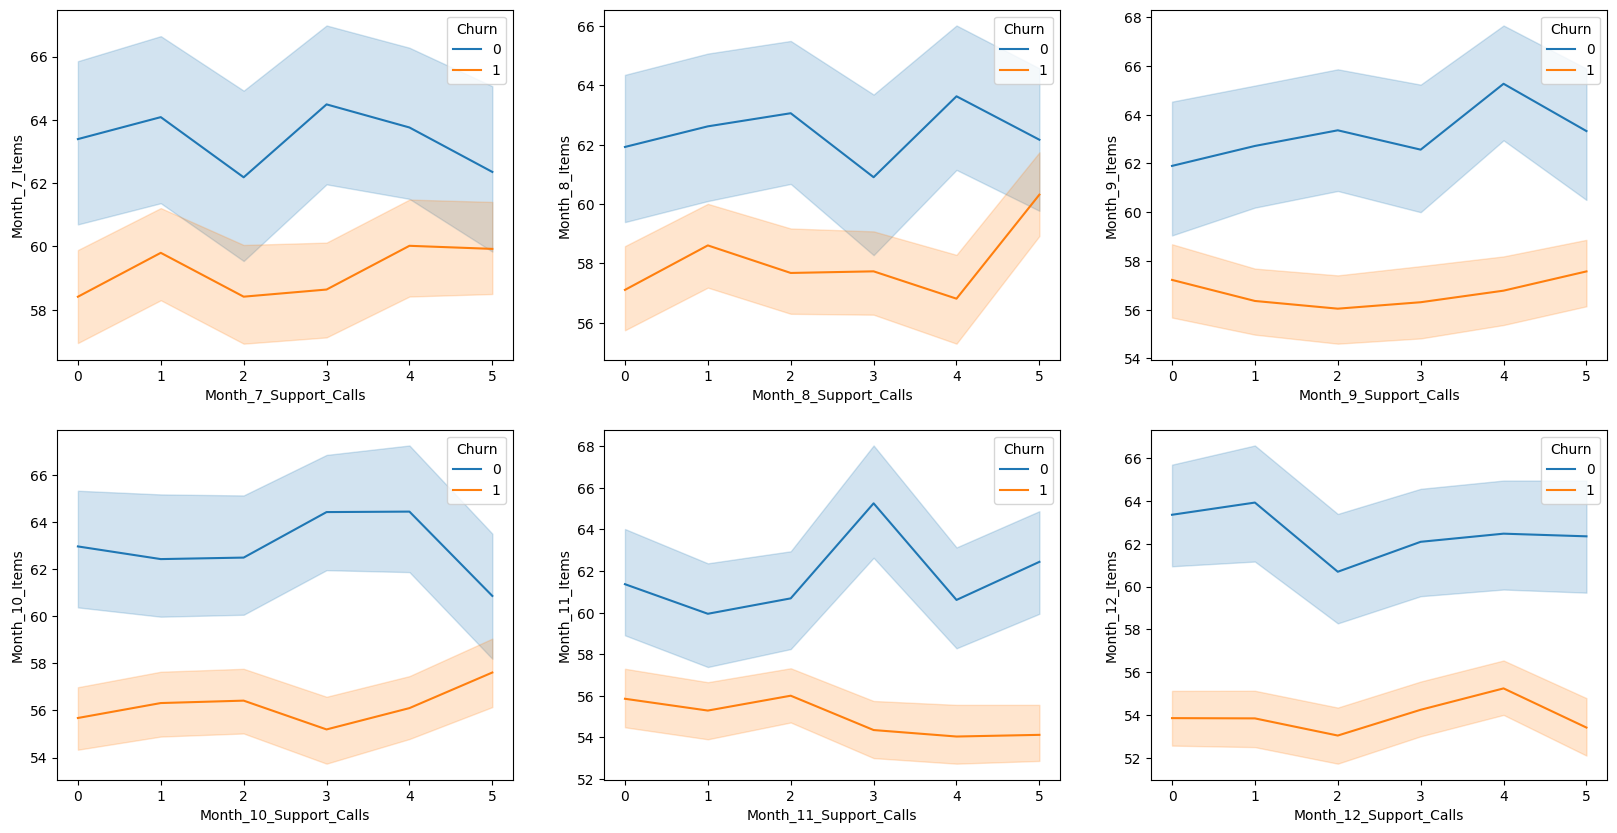

In [88]:
#Explore data to see the trend 
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.lineplot(x='Month_7_Support_Calls', y='Month_7_Items', ax=ax1, data=data, hue='Churn')
sns.lineplot(x='Month_8_Support_Calls', y='Month_8_Items', ax=ax2, data=data, hue='Churn')
sns.lineplot(x='Month_9_Support_Calls', y='Month_9_Items', ax=ax3, data=data, hue='Churn')
sns.lineplot(x='Month_10_Support_Calls', y='Month_10_Items', ax=ax4, data=data, hue='Churn')
sns.lineplot(x='Month_11_Support_Calls', y='Month_11_Items', ax=ax5, data=data, hue='Churn')
sns.lineplot(x='Month_12_Support_Calls', y='Month_12_Items', ax=ax6, data=data, hue='Churn')

<AxesSubplot:xlabel='Month_6_Support_Calls', ylabel='Month_6_Spend'>

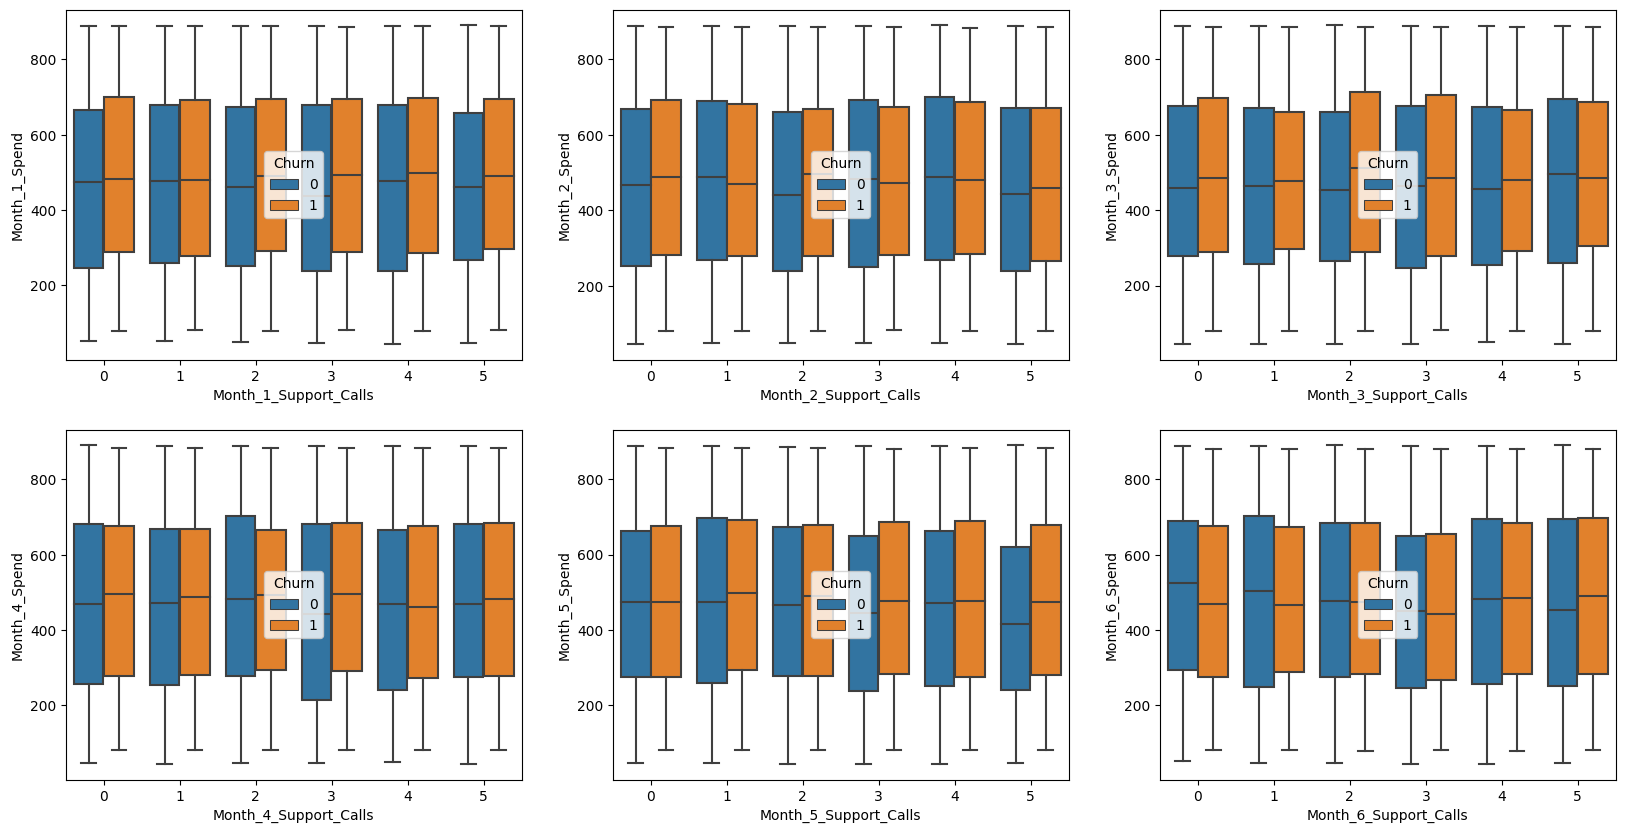

In [89]:
#From the trend above plot the pair plot of numerical variables
#Explore data to see the trend 
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(x='Month_1_Support_Calls', y='Month_1_Spend', ax=ax1, data=data, hue='Churn')
sns.boxplot(x='Month_2_Support_Calls', y='Month_2_Spend', ax=ax2, data=data, hue='Churn')
sns.boxplot(x='Month_3_Support_Calls', y='Month_3_Spend', ax=ax3, data=data, hue='Churn')
sns.boxplot(x='Month_4_Support_Calls', y='Month_4_Spend', ax=ax4, data=data, hue='Churn')
sns.boxplot(x='Month_5_Support_Calls', y='Month_5_Spend', ax=ax5, data=data, hue='Churn')
sns.boxplot(x='Month_6_Support_Calls', y='Month_6_Spend', ax=ax6, data=data, hue='Churn')

<AxesSubplot:xlabel='Month_12_Support_Calls', ylabel='Month_12_Spend'>

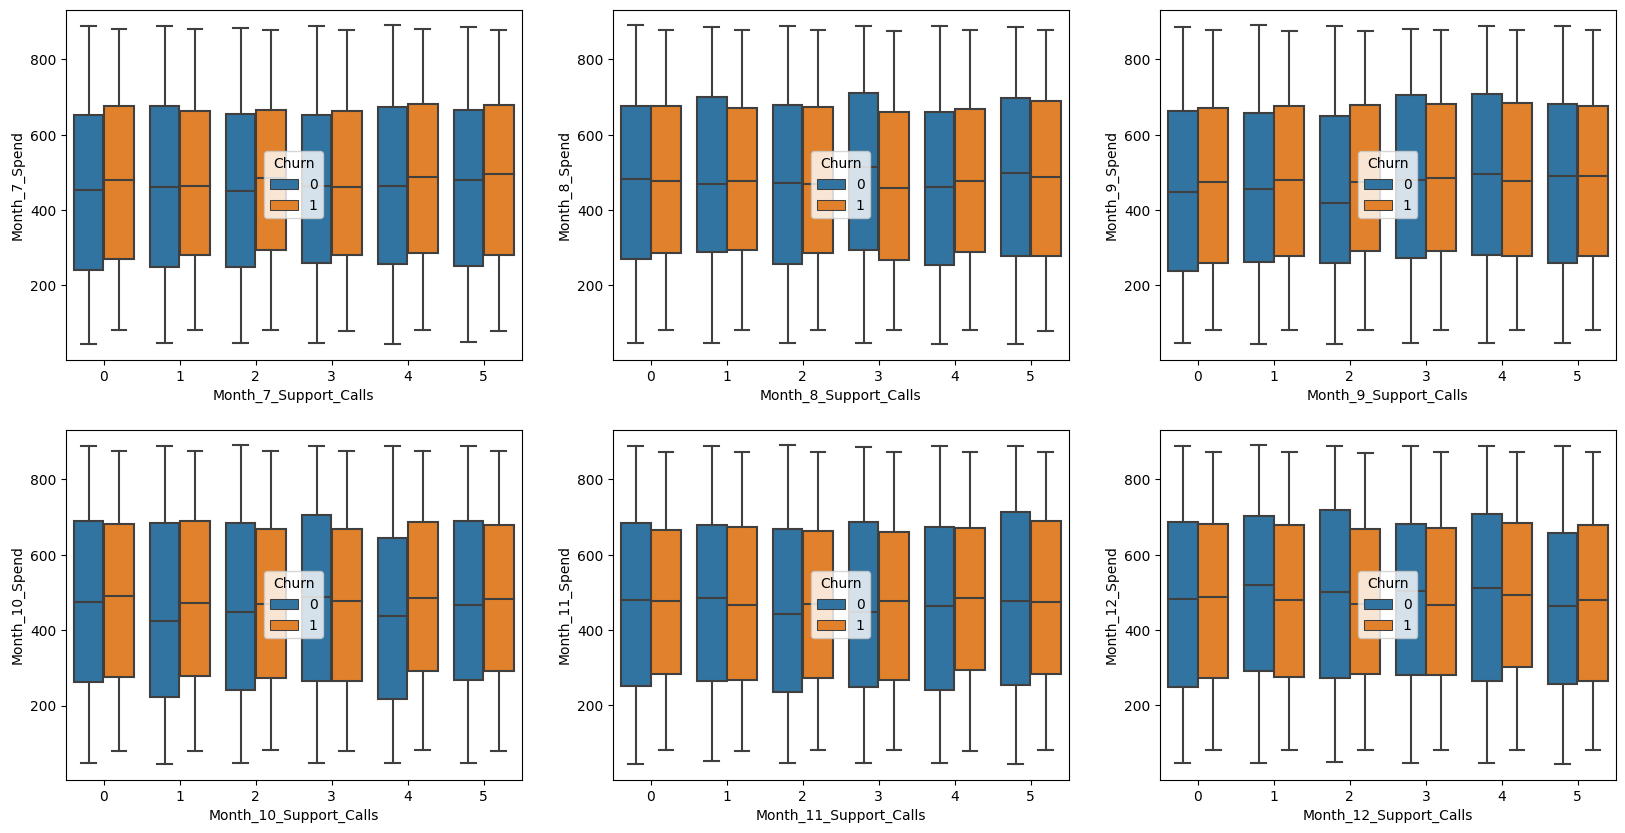

In [90]:
#From the trend above plot the pair plot of numerical variables
#Explore data to see the trend 
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20,10))
sns.boxplot(x='Month_7_Support_Calls', y='Month_7_Spend', ax=ax1, data=data, hue='Churn')
sns.boxplot(x='Month_8_Support_Calls', y='Month_8_Spend', ax=ax2, data=data, hue='Churn')
sns.boxplot(x='Month_9_Support_Calls', y='Month_9_Spend', ax=ax3, data=data, hue='Churn')
sns.boxplot(x='Month_10_Support_Calls', y='Month_10_Spend', ax=ax4, data=data, hue='Churn')
sns.boxplot(x='Month_11_Support_Calls', y='Month_11_Spend', ax=ax5, data=data, hue='Churn')
sns.boxplot(x='Month_12_Support_Calls', y='Month_12_Spend', ax=ax6, data=data, hue='Churn')

In [91]:
#define function to porpotion variables 
def cat_var(x,y,count_var,df):
    variable = df.groupby([x,y])[[count_var]].count().unstack()
    variable['total'] = variable[count_var][0] + variable[count_var][1]
    variable['N_churn'] = variable[count_var][0]/variable['total']
    variable['Y_churn'] = variable[count_var][1]/variable['total']
    return variable

In [92]:
#get the porpotion for location
churn_location = cat_var('Location','Churn','CustomerID',data)
churn_location



CustomerID           total   N_churn   Y_churn
Churn                  0       1                            
Location                                                    
Australia          725.0     NaN     NaN       NaN       NaN
Canada             763.0  3495.0  4258.0  0.179192  0.820808
Great Britain      762.0     NaN     NaN       NaN       NaN
US                 750.0  3505.0  4255.0  0.176263  0.823737

In [93]:
#get the porpotion for device
churn_device = cat_var('Device','Churn','CustomerID',data)
churn_device
# it showes that individuals with andriods are more likely to churn

CustomerID       total   N_churn   Y_churn
Churn            0     1                          
Device                                            
Android        896  4840  5736  0.156206  0.843794
iOS           2104  2160  4264  0.493433  0.506567

In [94]:
#convert age to bins 
def age_bin(x):
    if x <= 30:
        return '>= 30'
    elif x > 50 :
        return 'above 50'
    else:
        return '30-50'

#apply function to data 
data['age_cat'] = data['Age'].apply(age_bin)
data

,CustomerID,Age,Location,Device,Month_1_Spend,Month_1_Items,Month_1_Support_Calls,Month_2_Spend,Month_2_Items,Month_2_Support_Calls,...,Month_10_Items,Month_10_Support_Calls,Month_11_Spend,Month_11_Items,Month_11_Support_Calls,Month_12_Spend,Month_12_Items,Month_12_Support_Calls,Churn,age_cat
0,1,46,US,iOS,756.005761,39,2,582.023075,92,2,...,60,0,700.181510,66,3,382.719682,59,0,1,30-50
1,2,52,US,iOS,594.838157,59,0,251.269898,33,2,...,89,1,571.331352,28,3,570.203975,89,0,1,above 50
2,3,43,Canada,Android,453.217405,21,3,124.178946,92,0,...,60,5,198.222684,38,1,187.475764,79,5,1,30-50
3,4,41,US,iOS,621.453170,95,1,134.362559,46,5,...,59,3,565.395592,78,1,281.415092,63,4,1,30-50
4,5,41,US,iOS,660.735119,48,5,713.265527,54,2,...,85,1,574.382094,34,2,544.981985,28,2,1,30-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,35,Great Britain,iOS,496.165324,84,1,735.148231,60,2,...,77,4,672.755957,23,5,710.675753,60,4,0,30-50
9996,9997,59,Great Britain,iOS,138.836616,76,3,673.599667,52,4,...,57,4,379.113761,75,4,870.230372,15,3,0,above 50
9997,9998,45,US,iOS,533.289217,106,4,367.139990,41,1,...,50,3,633.113010,89,5,624.403650,35,4,0,30-50
9998,9999,58,Australia,iOS,684.746137,70,0,751.149320,105,4,...,32,5,103.703552,97,5,731.775049,28,4,0,above 50


In [95]:
#get the porpotion for age
churn_age = cat_var('age_cat','Churn','CustomerID',data)
churn_age
#It shows that most individuals younger than 30 are more likely to churn and the individuals 
#that are 50 and above are less likely to churn

CustomerID       total   N_churn   Y_churn
Churn             0     1                          
age_cat                                            
30-50          1504  3209  4713  0.319117  0.680883
>= 30           388  1742  2130  0.182160  0.817840
above 50       1108  2049  3157  0.350966  0.649034

In [96]:
data.columns

Index(['CustomerID', 'Age', 'Location', 'Device', 'Month_1_Spend',
       'Month_1_Items', 'Month_1_Support_Calls', 'Month_2_Spend',
       'Month_2_Items', 'Month_2_Support_Calls', 'Month_3_Spend',
       'Month_3_Items', 'Month_3_Support_Calls', 'Month_4_Spend',
       'Month_4_Items', 'Month_4_Support_Calls', 'Month_5_Spend',
       'Month_5_Items', 'Month_5_Support_Calls', 'Month_6_Spend',
       'Month_6_Items', 'Month_6_Support_Calls', 'Month_7_Spend',
       'Month_7_Items', 'Month_7_Support_Calls', 'Month_8_Spend',
       'Month_8_Items', 'Month_8_Support_Calls', 'Month_9_Spend',
       'Month_9_Items', 'Month_9_Support_Calls', 'Month_10_Spend',
       'Month_10_Items', 'Month_10_Support_Calls', 'Month_11_Spend',
       'Month_11_Items', 'Month_11_Support_Calls', 'Month_12_Spend',
       'Month_12_Items', 'Month_12_Support_Calls', 'Churn', 'age_cat'],
      dtype='object')

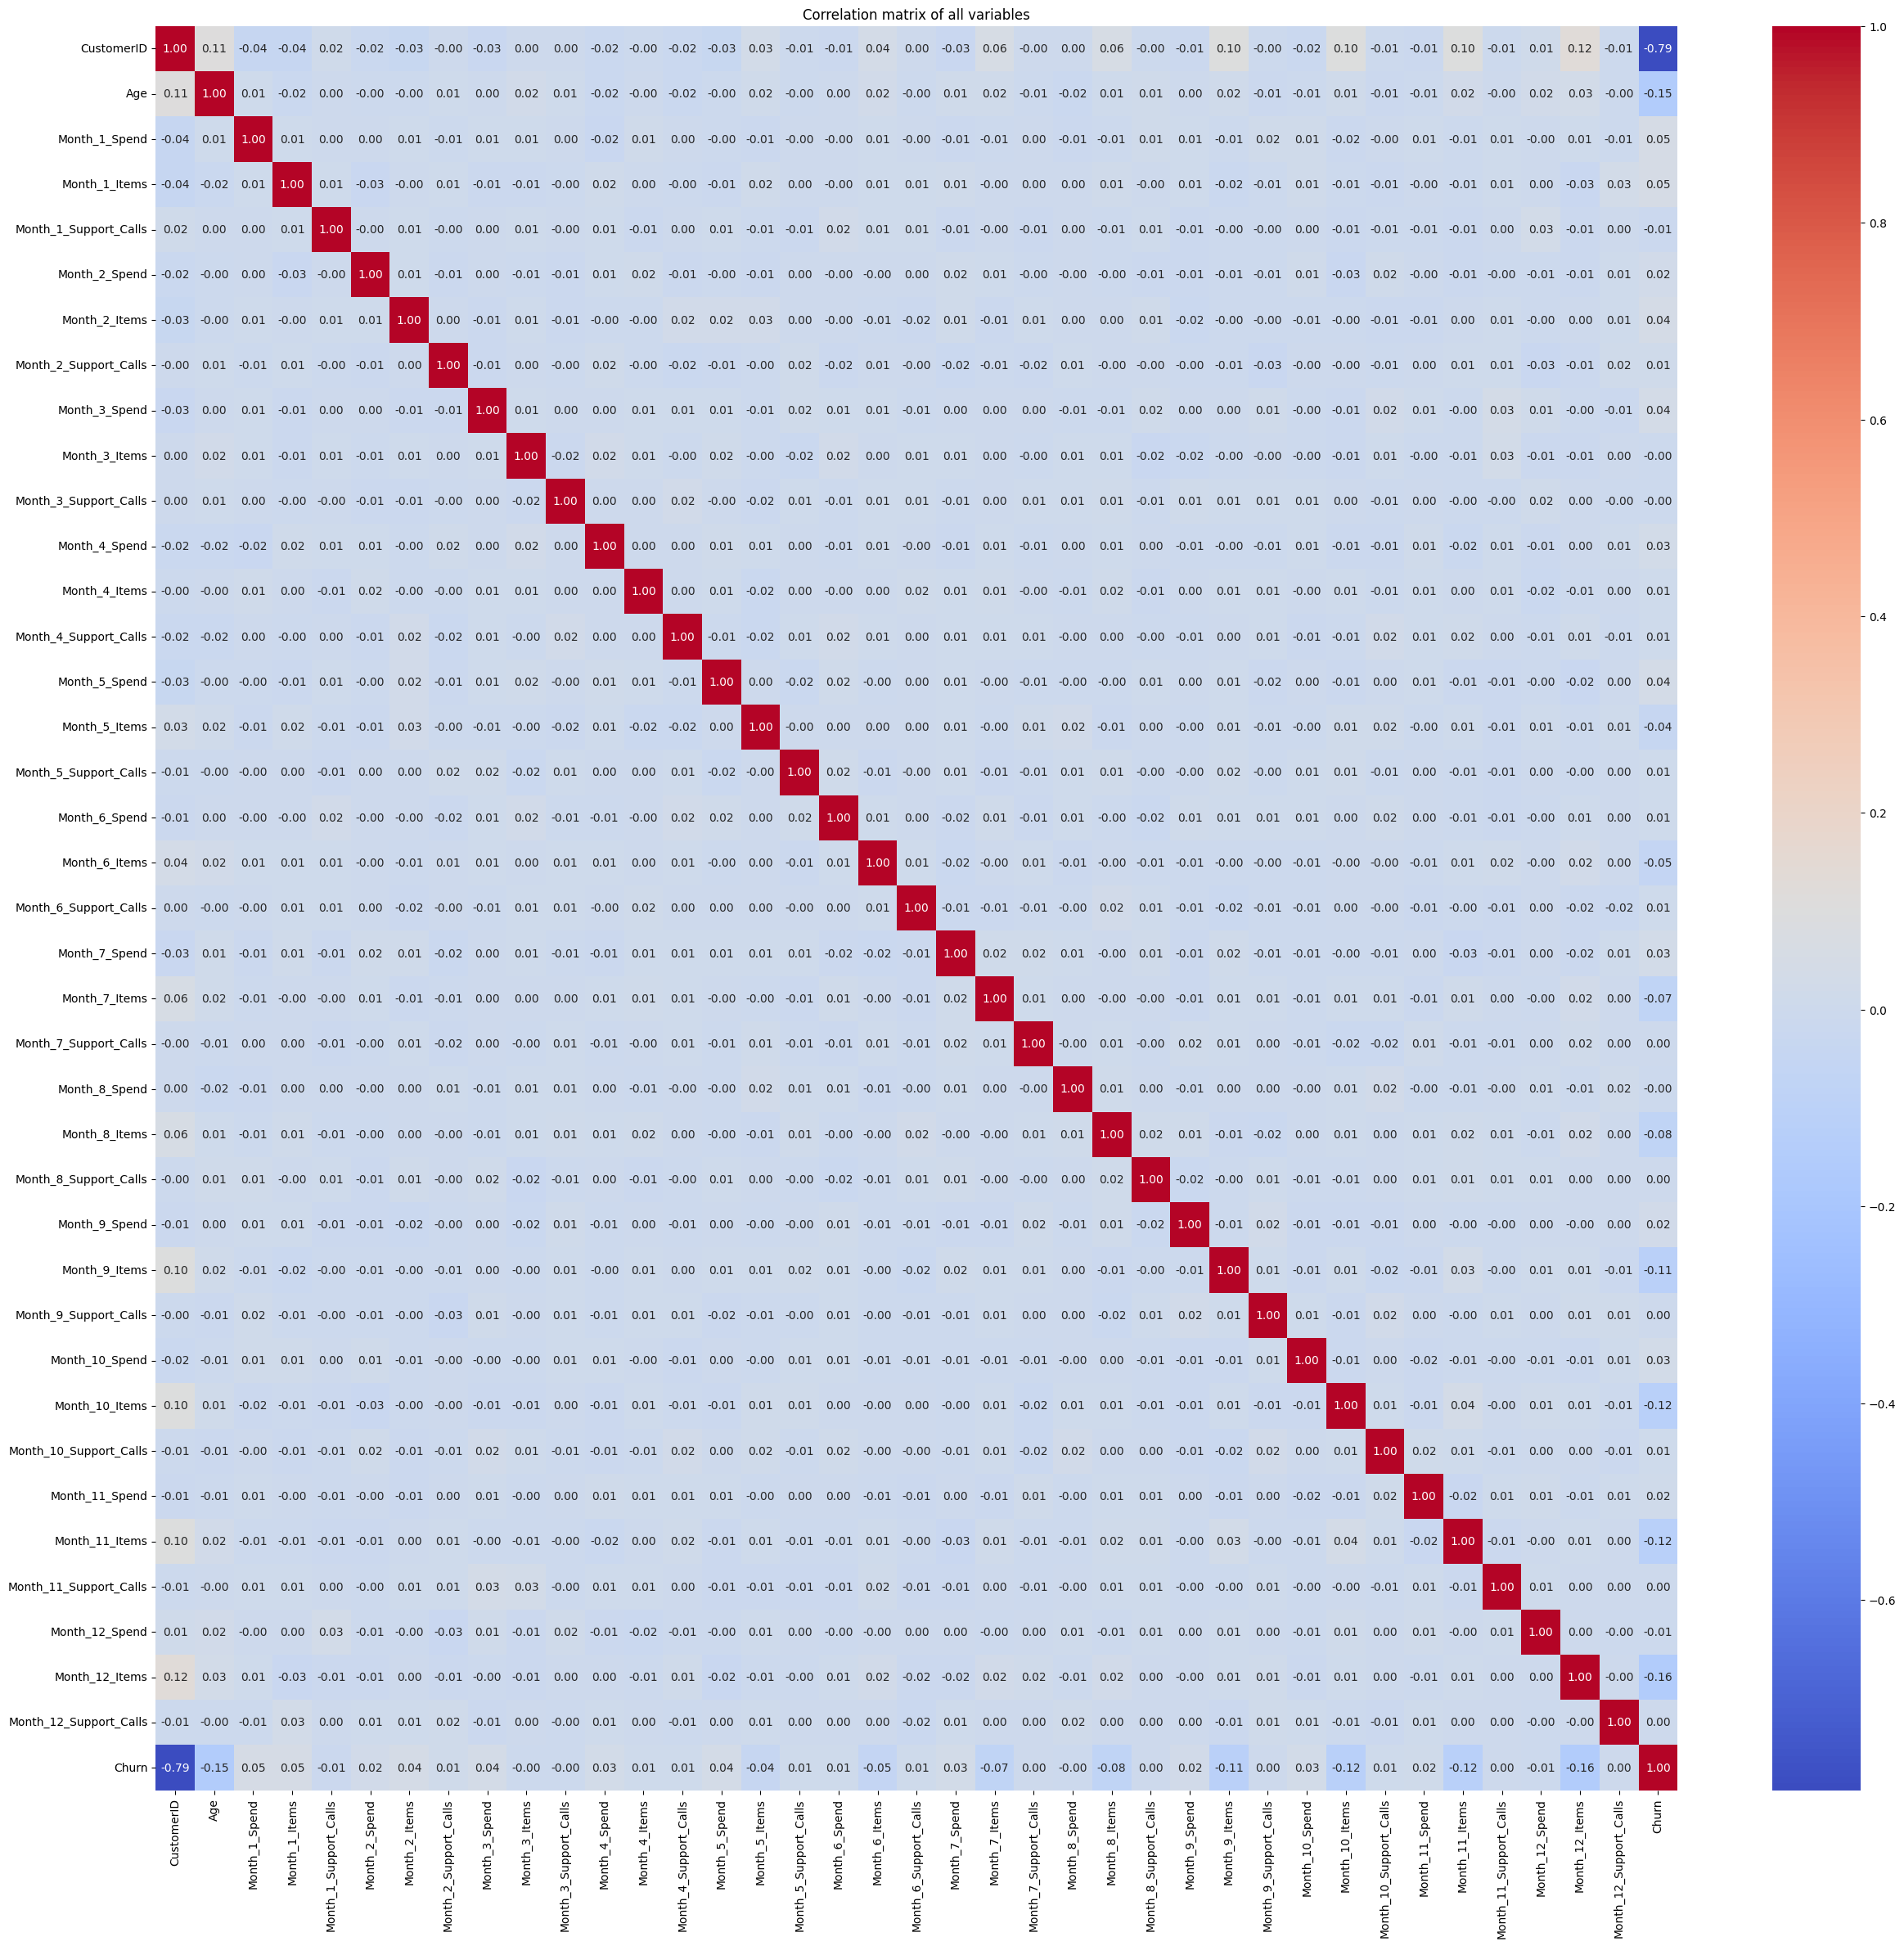

In [100]:
#get the correlation 
corr = data.corr()
# Plot heatmap of correlation matrix
plt.figure(figsize=(30, 28))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation matrix of all variables')
plt.show()


Development of hypothetis 
From the above, we can acertain the that 
number of calls has a negative relationship with amount spend and number of items purchased. 
The more calls that are made over the period of 12 months decreases the amount spent and number purchased
 
Also age, device and location are also drivers of churning.
From the data above, we can see that individuals that are above 30 are less likely to churn while those that are above 30 are .

While individuals using an andriod phone are more likely to churn than those using an apple phone. Also, we can see that most individuals who churn live in Canada while individuals in other countries have churned

From the above our hypothesis is that number of calls, amount purchased, number of items, location, age and device are the drivers of churning 


#Building the model.

To build the predictor model, I would use:
Logistic regression
Knn 
Naive bayes

In [101]:
data.columns

Index(['CustomerID', 'Age', 'Location', 'Device', 'Month_1_Spend',
       'Month_1_Items', 'Month_1_Support_Calls', 'Month_2_Spend',
       'Month_2_Items', 'Month_2_Support_Calls', 'Month_3_Spend',
       'Month_3_Items', 'Month_3_Support_Calls', 'Month_4_Spend',
       'Month_4_Items', 'Month_4_Support_Calls', 'Month_5_Spend',
       'Month_5_Items', 'Month_5_Support_Calls', 'Month_6_Spend',
       'Month_6_Items', 'Month_6_Support_Calls', 'Month_7_Spend',
       'Month_7_Items', 'Month_7_Support_Calls', 'Month_8_Spend',
       'Month_8_Items', 'Month_8_Support_Calls', 'Month_9_Spend',
       'Month_9_Items', 'Month_9_Support_Calls', 'Month_10_Spend',
       'Month_10_Items', 'Month_10_Support_Calls', 'Month_11_Spend',
       'Month_11_Items', 'Month_11_Support_Calls', 'Month_12_Spend',
       'Month_12_Items', 'Month_12_Support_Calls', 'Churn', 'age_cat'],
      dtype='object')

In [102]:
#building the model 
#define cat and numerical variables
cat_var = ['age_cat','Location','Device','Age']
num_var = [ 'Month_1_Spend',
       'Month_1_Items', 'Month_1_Support_Calls', 'Month_2_Spend',
       'Month_2_Items', 'Month_2_Support_Calls', 'Month_3_Spend',
       'Month_3_Items', 'Month_3_Support_Calls', 'Month_4_Spend',
       'Month_4_Items', 'Month_4_Support_Calls', 'Month_5_Spend',
       'Month_5_Items', 'Month_5_Support_Calls', 'Month_6_Spend',
       'Month_6_Items', 'Month_6_Support_Calls', 'Month_7_Spend',
       'Month_7_Items', 'Month_7_Support_Calls', 'Month_8_Spend',
       'Month_8_Items', 'Month_8_Support_Calls', 'Month_9_Spend',
       'Month_9_Items', 'Month_9_Support_Calls', 'Month_10_Spend',
       'Month_10_Items', 'Month_10_Support_Calls', 'Month_11_Spend',
       'Month_11_Items', 'Month_11_Support_Calls', 'Month_12_Spend',
       'Month_12_Items', 'Month_12_Support_Calls',]
target = ['Churn']

In [103]:
#Start with day of the week
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(data[cat_var + num_var]
                                                    ,data[target],
                                                    test_size = 0.3, random_state=1234)

In [106]:
#define transformers and encoder
categorical_transformer = Pipeline(steps=[('onehot',OneHotEncoder(handle_unknown='ignore'))])
numerical_transformer = Pipeline(steps=[('scaler',StandardScaler())])

In [109]:
#build the preprocessor 
preprocessor = ColumnTransformer(transformers=[('categorical',categorical_transformer, cat_var),
                                               ('numerical',numerical_transformer,num_var) ])

In [110]:
#define logistic regression model
log = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', LogisticRegression())])



In [111]:
#define knn model
knn = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', KNeighborsClassifier())])

In [116]:
#define naive bayes model
nb = knn = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('regressor', GaussianNB())])

In [118]:
#fit models 
knn.fit(X_train, y_train)
log.fit(X_train, y_train)
nb.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation fo

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['age_cat', 'Location',
                                                   'Device', 'Age']),
                                                 ('numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Month_1_Spend',
                                                   'Month_1_Items',
                                                   'Month_1_Support_Calls',
                                                   'Month_2_Spend',
                                                   'Month_2_Ite

In [119]:
#test the models
pred_knn = knn.predict(X_test)
pred_log = log.predict(X_test)
pred_nb = nb.predict(X_test)


In [120]:
#evaluate models
print(f1_score(pred_knn,y_test))
print(f1_score(pred_log,y_test))
print(f1_score(pred_nb,y_test))

0.2572716099959033
0.9162234042553192
0.2572716099959033


The logistic regression has the highest score so we would proceed to tune our model. Inorder to tune our model, we would require more than the f1_score as an evaluation metrics 

In [128]:
print(f1_score(pred_log,y_test))
print(recall_score(pred_log,y_test))
print(accuracy_score(pred_log,y_test))
print(precision_score(pred_log,y_test))


0.9162234042553192
0.8666666666666667
0.874
0.9717912552891397


In [129]:
#get the logistic probabilities
log_pred_prob = log.predict_proba(X_test)

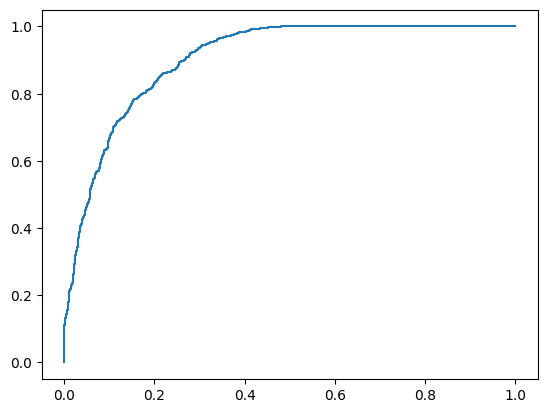

In [130]:
#get the true postive rate, false positive rate and thresholds and plot the tpr and fpr
fpr, tpr, thresholds = roc_curve(y_test,log_pred_prob[:,1])
plt.plot(fpr,tpr)

In [131]:
gmeans = np.sqrt(tpr*(1-fpr))
print(thresholds[np.argmax(gmeans)])
print(gmeans[np.argmax(gmeans)])

0.7055490297901117
0.8198390590168554


In [132]:
y_pred_new = []
for i in log_pred_prob[:,1]:
  if i < 0.7055490297901117:
    y_pred_new.append(0)
  else:
    y_pred_new.append(1)

In [134]:
print(f1_score(y_pred_new,y_test))
print(recall_score(y_pred_new,y_test))
print(accuracy_score(y_pred_new,y_test))
print(precision_score(y_pred_new,y_test))

0.880831520425429
0.9064676616915422
0.8356666666666667
0.8566055477197931



From the above we got the below scores

F1 : 0.9162234042553192
Recall:  0.8666666666666667
accuracy: 0.874
precision: 0.9717912552891397

After tuning our model, we got following 
F1 : 0.880831520425429
Recall:  0.9064676616915422
accuracy: 0.8356666666666667
precision: 0.8566055477197931

From the above, we received an f1 score of 88%. This means that our model has been able to successfully predict customer who will churn and did churn 88% of the time. it also has a precision score of 85% this means that the individuals our model predicted would churn, 85% of them churned. While the accuracy score of 83% means our model has been right 83% of the time and for our recall of 90% shows that our model has a successfully predicted people who would churn 90% of the time . 

Recommendation

While the model score are really good, the training data was skewed with majority of the data leaing towards individuals who churned. Therefore, to proceed with this model, it is recommended that the model is exposed to more balanced data and more training time. 
